# Boston AirBnB Data

### Business Understanding:
##### Airbnb has been revolutionizing travel experiences since 2008, offering guests and hosts a unique, personalized way to explore destinations like Boston, MA. As part of the Airbnb Inside initiative, this dataset provides insights into the listing activity of homestays in Boston.

## Using this dataset, 
### we aim to uncover key insights related to Airbnb rentals in Boston:

##### Factors influencing Airbnb rental prices in Boston:
##### Identify the major factors that contribute to the pricing of Airbnb rentals, including property attributes, amenities, location, and seasonal variations.
##### Neighborhoods with the highest rental prices in Boston:
##### Determine which neighborhoods in Boston command the highest rental prices for Airbnb listings.
##### Seasonal variations in rental prices:
##### Analyze rental price fluctuations throughout the year to identify peak seasons and understand the impact of seasonality on Airbnb rental prices in Boston.

In [1]:
!pip install lightgbm

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, WeekdayLocator, DayLocator
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

In [5]:
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [7]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [10]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [11]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [13]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


## Clean
#### Remove urls as the url's directs to the home page wich is not very useful.
#### Removing all columns with more than 50% missing values
#### Remove text columns as they describe the home or surrounding.
#### Remove the sepecial and , signs in columns containing it and convert them to float to ease analysis.
#### Since there are few values missing,replace categorical missing values with their mode and continuous values with their mean

In [14]:
def clean_data(df):
    """
    INPUT:
    df - pandas dataframe containing listings informations in Boston
    
    OUTPUT:
    df_final - a new dataframe that has the following characteristics:
    - Remove urls as the url's directs to the home page wich is not very useful.
    - Removing all columns with more than 50% missing values
    - Remove text columns as they describe the home or surrounding.
    - Remove the $ ,% and , signs in columns containing it and convert them to float to ease analysis.
    - Since there are few values missing,replace categorical missing values with their mode and continuous values with their mean
    """
    
    
    df= df.drop(['listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','picture_url','xl_picture_url',
                 'host_url','host_thumbnail_url','host_picture_url','weekly_price','monthly_price',
                 'neighbourhood_group_cleansed','square_feet','has_availability','license','jurisdiction_names','first_review',
                 'last_review','market','neighbourhood', 'host_neighbourhood', 'host_about',
             'transit','notes', 'neighborhood_overview', 'space', 'summary','description','experiences_offered'], axis=1)
   

    # Roving characters in in prices, cleaning fee and security deposit
    df['cleaning_fee'],df['security_deposit'],df['price']=df.cleaning_fee.str.replace('$','').astype(float),df.security_deposit.str.replace('$',''),df.price.str.replace('$','')
    df.security_deposit = df.security_deposit.str.replace(',','').astype(float)
    df.price = df.price.str.replace(',','').astype(float)

    
    #Select the categorical columns 
    df_cat = df.select_dtypes(include=['object'])
    
    
    fill_mode = ['zipcode', 'city', 'host_response_time', 'host_location','property_type']
    # fill columns corresponding to fill_mode with their mode values
    for fill in fill_mode:
        df_cat[fill].fillna(df_cat[fill].mode()[0], inplace=True)
        
   
      #removing % and converting to float in a few columns  
    df_cat.host_acceptance_rate = df_cat.host_acceptance_rate.str.replace('%','').astype(float)
    df_cat.host_response_rate = df_cat.host_response_rate.str.replace('%','').astype(float)
    
     # filling some columns with their mean   
    df_cat['host_acceptance_rate'].fillna(df_cat['host_acceptance_rate'].mean(), inplace=True) 
    df_cat['host_response_rate'].fillna(df_cat['host_response_rate'].mean(), inplace=True) 
    
    # Select float and int datatypes in df
    df_con = df.select_dtypes(include=['int64', 'float64'])
    
    li= ['reviews_per_month','review_scores_value','review_scores_location','review_scores_communication','review_scores_checkin',
    'review_scores_cleanliness','review_scores_accuracy','review_scores_rating','beds','bedrooms','bathrooms','cleaning_fee', 'security_deposit']
    
    # filling missing columns with their mean
    for i in li:
        df_con[i].fillna(df_con[i].mean(), inplace=True)
    df_final= pd.concat([df_cat, df_con], axis =1)
    return df_final
    

In [15]:
df = clean_data(listings)

## Analyze

In [16]:
def preprocess(df):
    """
     INPUT:
     df - pandas dataframe containing cleaned listings informations in Boston
     
     OUTPUT:
     X_train, X_test, y_train, y_test -  that has the following characteristics:
     
     - Normalized the continuous columns
     - Converting the object data type columns to category for use in Lightgbm
     - Splitting the data into data and label
     - Splitting the data into the training and testing dataset
    """
    # selecting int and float columns in df
    con = df.select_dtypes(['int64', 'float64']).copy()
    #Drop the label column(price)
    con=con.drop('price', axis=1)
    # Normalize the int and float columns in df
    con1 = preprocessing.StandardScaler().fit_transform(con)
    fr =  pd.DataFrame(con1,columns = con.columns)
    # Select the object tye columns in df
    cat = df.select_dtypes(['object']).copy()
    # concatenete both the categorical and continuous columns
    df1 = pd.concat([fr,cat], axis=1)
    
    X = df1
    
    # Normalizing the label y
    y = (df['price'].values- df['price'].min())/(df['price'].max() - df['price'].min()) 
    
    # Converting the object data type columns to category for use in Lightgbm
    for c in X.columns:
        col_type = X[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            X[c] = X[c].astype('category')
    # Splitting the data into the training and testing dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=314)
    
    return X_train, X_test, y_train, y_test,X,y

In [17]:
X_train, X_test, y_train, y_test ,X, y= preprocess(df)

In [18]:
fit_params={
    "early_stopping_rounds":10, 
            "eval_metric" : 'mae', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

In [19]:
# instantiate model
clf = lgb.LGBMRegressor(num_leaves=10, 
                        max_depth=5, 
                        random_state=314,
                        colsample_bytree=0.9,
                        subsample=0.9,
                        silent=True, 
                        metric='None', 
                        n_jobs=4, 
                        n_estimators=1000,
                        learning_rate=0.01)

# Training the model
clf.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 3054, number of used features: 56
[LightGBM] [Info] Start training from score 0.109185


LGBMRegressor(colsample_bytree=0.9, learning_rate=0.01, max_depth=5,
              metric='None', n_estimators=1000, n_jobs=4, num_leaves=10,
              random_state=314, silent=True, subsample=0.9)

In [20]:
# predicting X_test
y_pred = clf.predict(X_test)

[LightGBM] [Warning] Unknown parameter: silent


In [21]:
#Accuracy
mean_absolute_error =mean_absolute_error(y_pred,y_test)

In [22]:
# overall mean_absolute_error 
mean_absolute_error

0.03217415757327682

<Axes: >

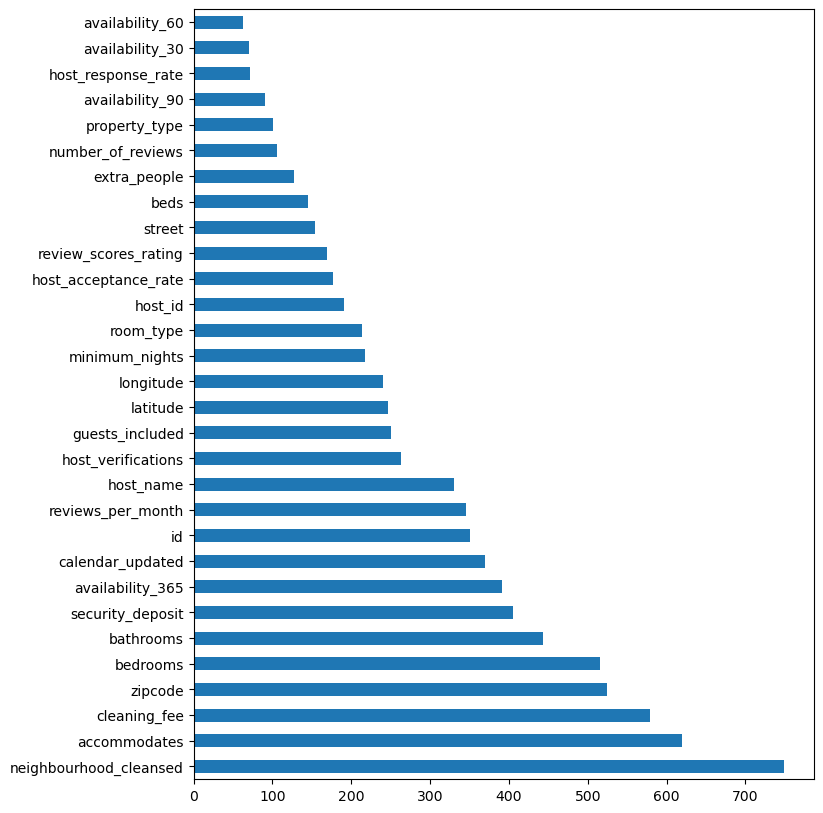

In [23]:
# Plotting features by importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

## Changes made in code to predict the pricing in AirBnb 

In [24]:
class LGBMRegressor_GainFE(lgb.LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [25]:
clf2 = LGBMRegressor_GainFE(num_leaves= 15, max_depth=10, 
                         random_state=314, 
                         silent=True, 
                         metric='mae', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)


In [26]:
clf2.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 3054, number of used features: 56
[LightGBM] [Info] Start training from score 0.109185


LGBMRegressor_GainFE(colsample_bytree=0.9, learning_rate=0.01, max_depth=10,
                     metric='mae', n_estimators=1000, n_jobs=4, num_leaves=15,
                     random_state=314, silent=True, subsample=0.9)

<Axes: >

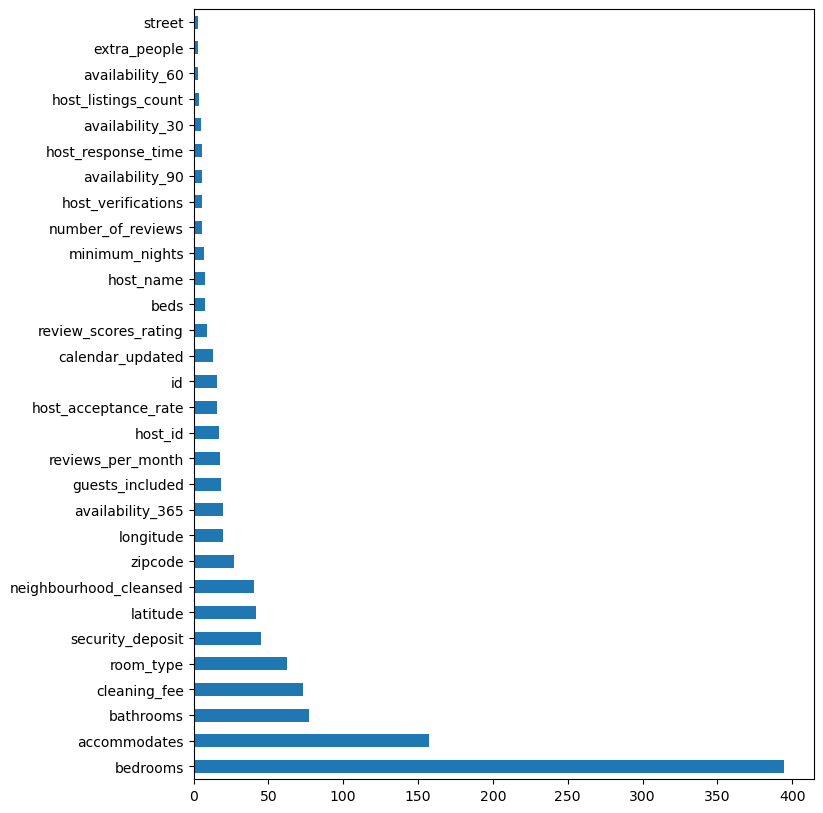

In [27]:
feat_imp = pd.Series(clf2.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

## Busiest Period for bookings


In [28]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
days = DayLocator()  # every day
yearsFmt = DateFormatter('Y%')
monthsFmt = DateFormatter('%Y-%m')

In [29]:
def model(calendar):
    """
    INPUT:
    calendar_data - include listing id and the price and availability for that day
    OUTPUT:
    grouped_data - a new dataframe that has the following characteristics:
    - get the date and available columns
    - convert available column to 0 if available and 1 if not(since not available means it's busy) to do further grouping operation
    - grouping date by mean of available
    """
    #The busiest days in Seattle, which equals to number of not_available_apartments over all the apartments
    #in Seattle
    available_apartments = calendar[['date', 'available']]
    #convert available column to 0 if available and 1 if not(since not available means it's busy) to do further grouping operation
    available_clm = available_apartments.apply(lambda row : 0 if row['available'] == 't' else 1, 1)
    available_apartments.loc[:,'available'] = available_clm
    #grouping date by mean of available
    grouped_data   = available_apartments.groupby([available_apartments.date]).agg(['mean'])
    return grouped_data 

In [30]:
grouped_data = model(calendar)

In [31]:
grouped_data.head()

,available
,mean
date,
2016-01-04,0.545574
2016-01-05,0.511001
2016-01-06,0.521739
2016-01-07,0.534835
2016-01-08,0.533263


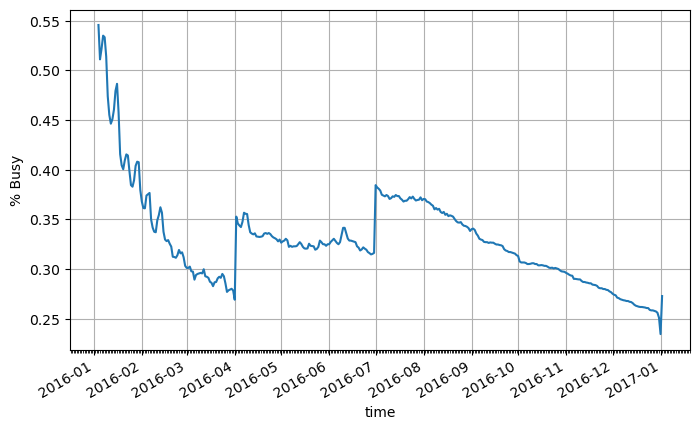

In [32]:
#plotting the availability over days
dates = pd.to_datetime(grouped_data.index.values, errors='ignore')
#dates = dates.astype(datetime)
#dates = matplotlib.dates.date2num(dates)

fig, axs = plt.subplots(1,1)
axs.plot_date(dates,grouped_data['available']['mean'].tolist(), '-')
          

axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(monthsFmt)
axs.xaxis.set_minor_locator(days)
axs.autoscale_view()
axs.fmt_xdata = DateFormatter('%Y-%m-%d')
axs.grid(True)
axs.set_xlabel('time')
axs.set_ylabel('% Busy')

fig.adjustable = True
fig.set_size_inches(8, 5) 
fig.autofmt_xdate()
plt.show()

## Popular Amenities in AirBnB

In [51]:
amenities = listings['amenities'].apply(lambda x: [a.replace('{', '').replace('}', '').replace('"', '') for a in x.split(',')])

In [54]:
mlb = MultiLabelBinarizer() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html
amenities_result = pd.DataFrame(mlb.fit_transform(amenities), index=amenities.index, columns=mlb.classes_)

In [55]:
amenities_count=amenities_result.sum().sort_values(ascending=False)

Text(0.5, 0, 'Occurence')

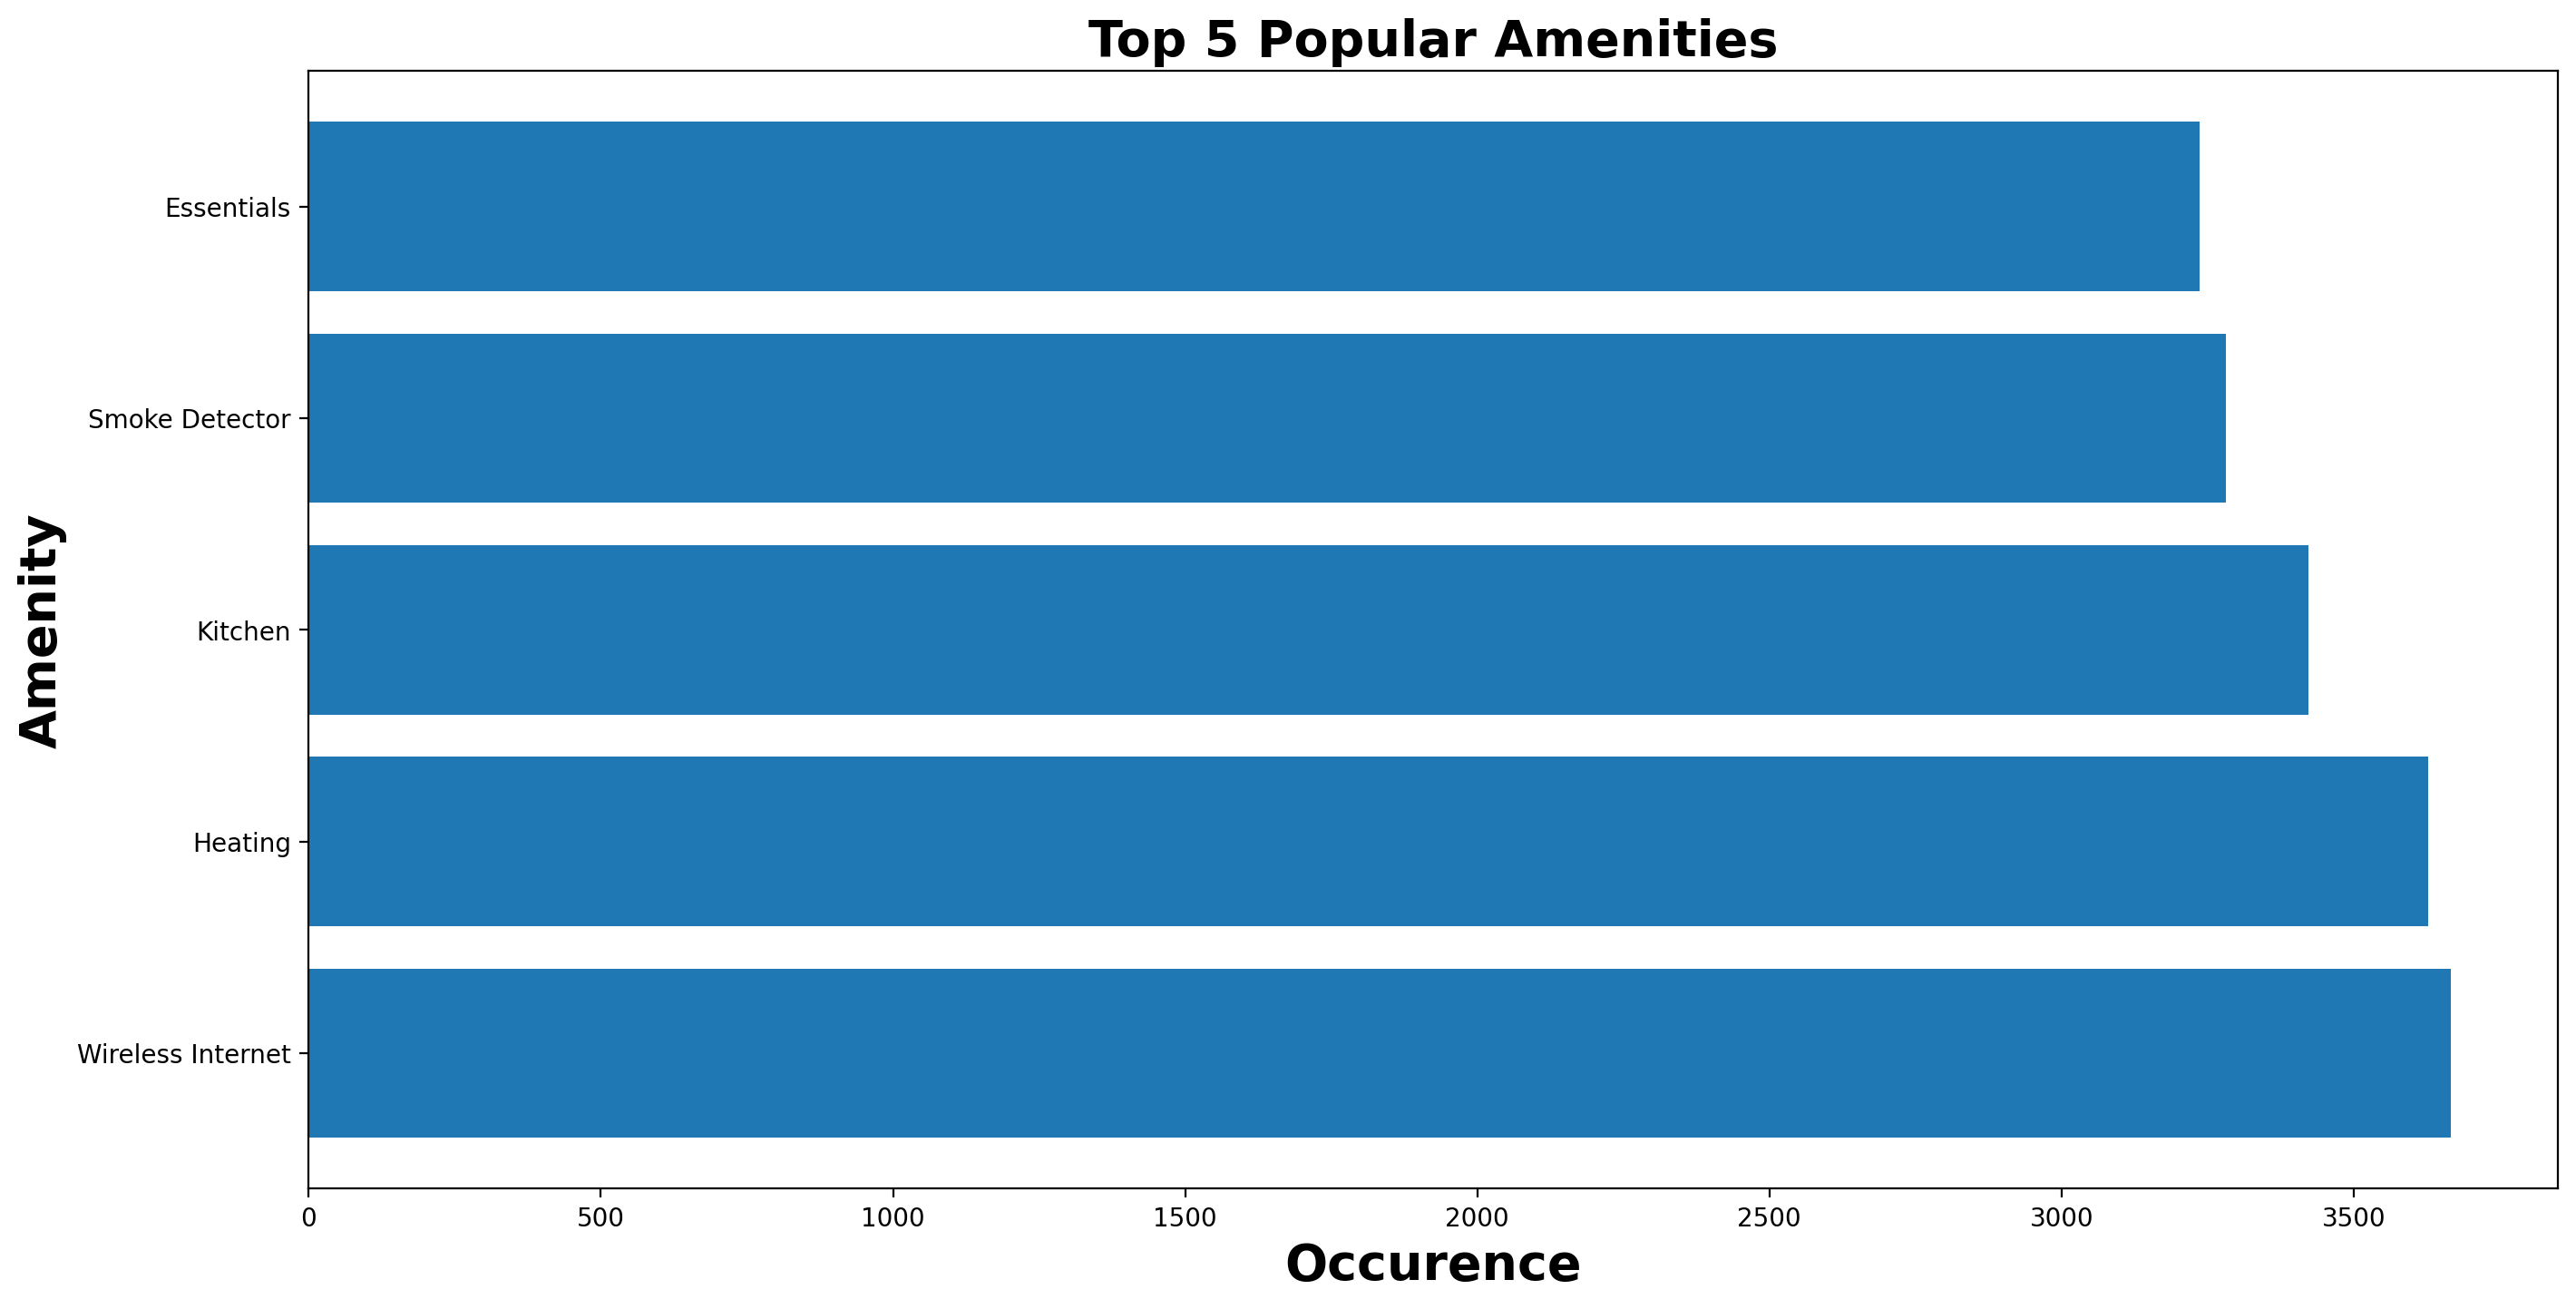

In [56]:
plt.figure(figsize=(16,8),dpi=200)
plt.barh(amenities_count[:5].index,amenities_count[:5].values)
plt.title('Top 5 Popular Amenities', weight='bold', size =20)
plt.ylabel('Amenity', weight='bold', size =20)
plt.xlabel('Occurence', weight='bold', size =20)